In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins.csv')

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df = df.drop_duplicates()
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [5]:
df.sex.value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [6]:
df = df[df['sex'] != '.']

df.sex.value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

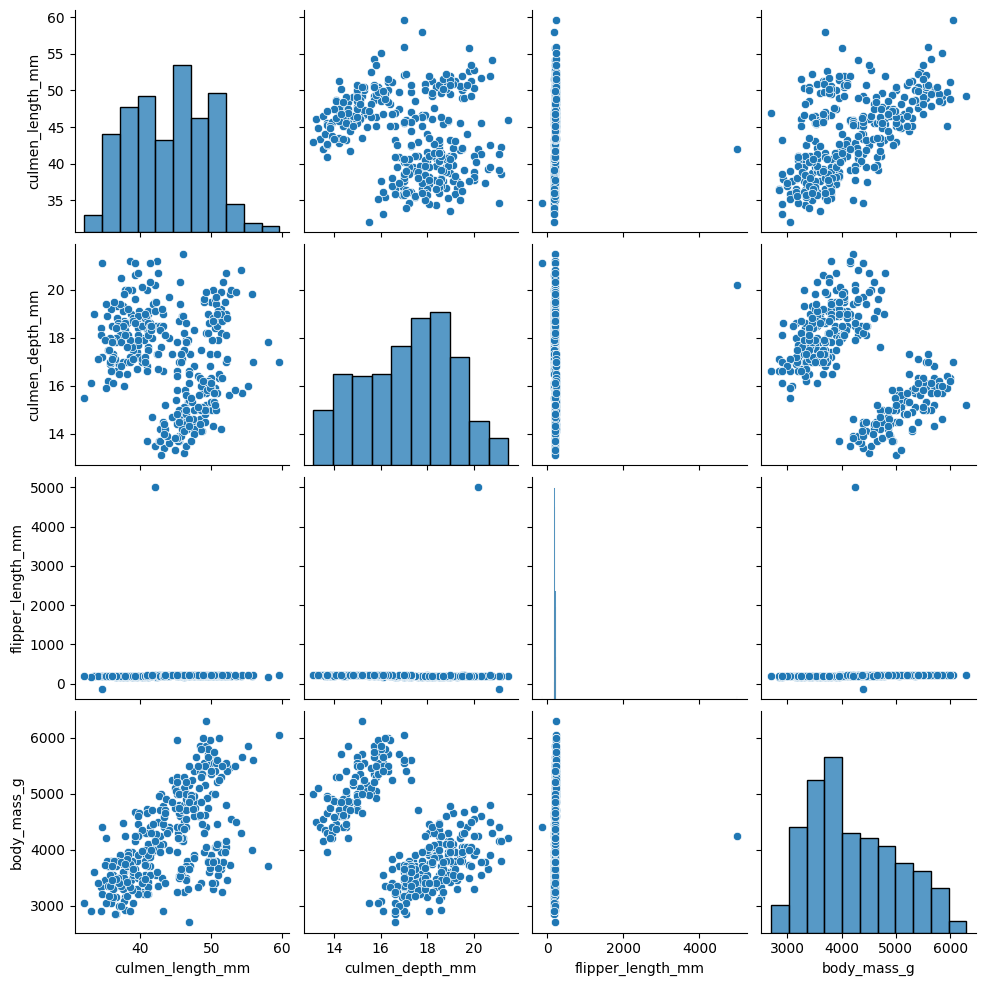

In [7]:
sns.pairplot(df)

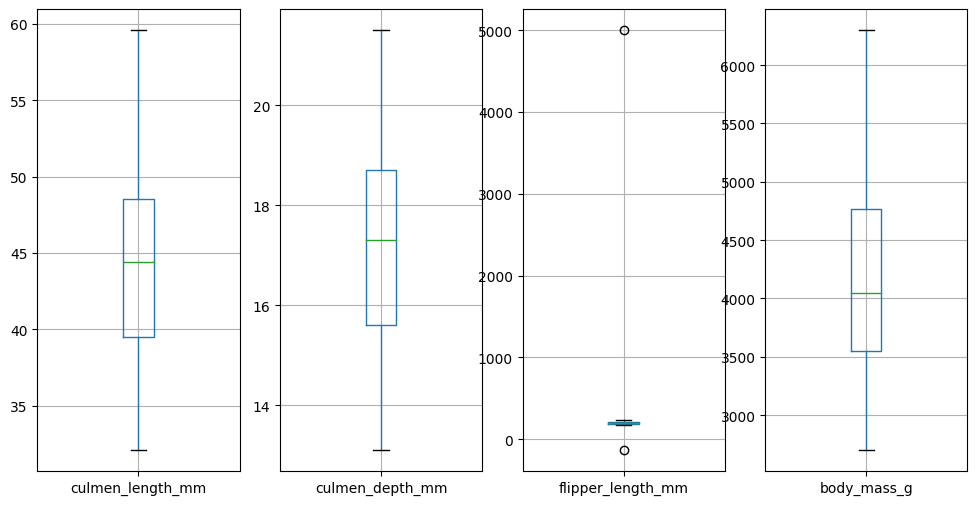

In [10]:
variables = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']

n_vars = len(variables)

fig, axes = plt.subplots(ncols=n_vars, figsize =(12,6))

for i,var in enumerate(variables):
    ax = axes[i]
    df.boxplot(column=var, ax=ax)

plt.show()


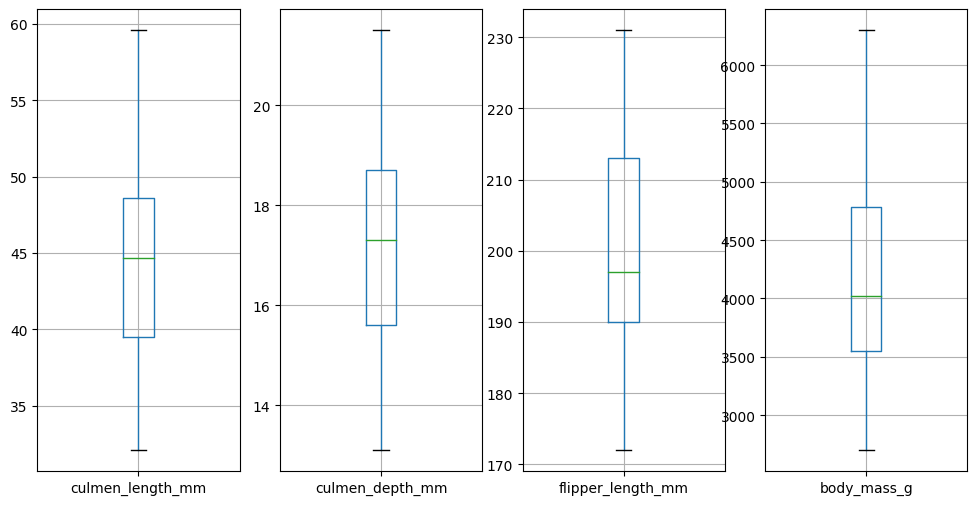

In [11]:
def removeIQR(df,variables):
    for var in variables:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[var] > lower_bound) & (df[var] < upper_bound)]
    
    return df

df = removeIQR(df,['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g'])

variables = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']

n_vars = len(variables)

fig, axes = plt.subplots(ncols=n_vars, figsize =(12,6))

for i,var in enumerate(variables):
    ax = axes[i]
    df.boxplot(column=var, ax=ax)

plt.show()


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']] = scaler.fit_transform(df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']])

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,0.433494,0.482501,0.491117,0.418466
std,0.198271,0.233366,0.237898,0.223989
min,0.000000,0.000000,0.000000,0.000000
25%,0.269091,0.297619,0.305085,0.236111
50%,0.458182,0.500000,0.423729,0.368056
75%,0.600909,0.666667,0.694915,0.578125
max,1.000000,1.000000,1.000000,1.000000


In [13]:
df = pd.get_dummies(df,columns=['sex'],dtype=int)

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.433494,0.482501,0.491117,0.418466,0.496988,0.503012
std,0.198271,0.233366,0.237898,0.223989,0.500746,0.500746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269091,0.297619,0.305085,0.236111,0.000000,0.000000
50%,0.458182,0.500000,0.423729,0.368056,0.000000,1.000000
75%,0.600909,0.666667,0.694915,0.578125,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df = pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2'])

df.head()

,PC1,PC2
0,0.629395,-0.501657
1,-0.748866,-0.192875
2,-0.744718,-0.207199
3,-0.737736,-0.324731
4,0.666268,-0.542969


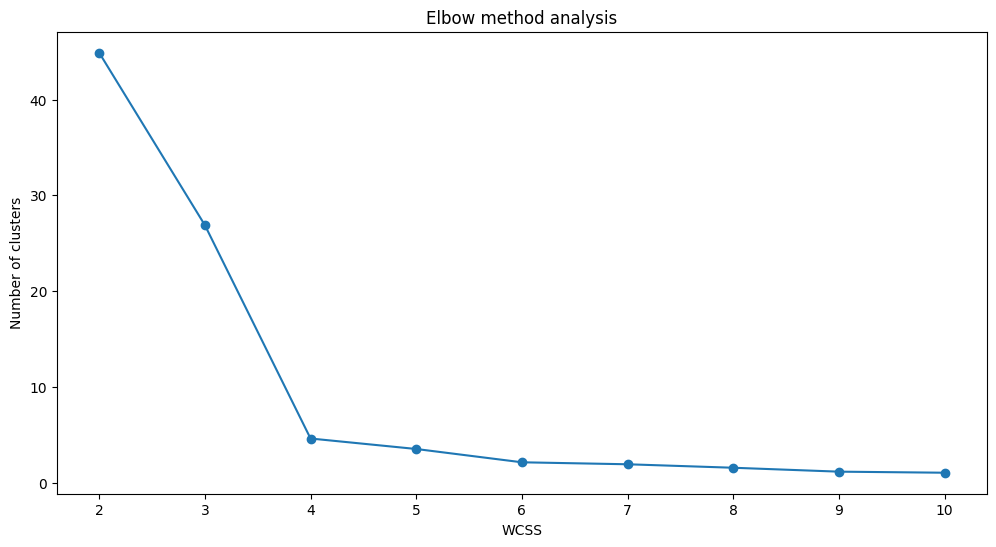

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

WCSS = []

for i in range (2,11):
    kmeans = KMeans(n_clusters=i,random_state=42).fit(df)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(2,11),WCSS,marker='o')
plt.title("Elbow method analysis")
plt.xlabel("WCSS")
plt.ylabel("Number of clusters")
plt.show()

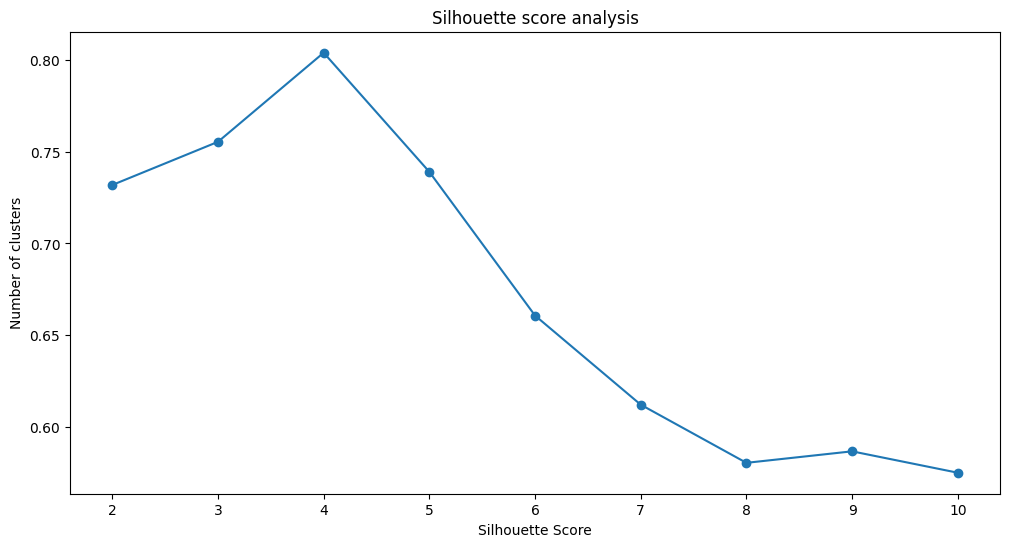

In [19]:

silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42).fit(df)
    silhouette.append(silhouette_score(df,kmeans.labels_))

plt.figure(figsize=(12,6))
plt.plot(range(2,11),silhouette,marker='o')
plt.title("Silhouette score analysis")
plt.xlabel("Silhouette Score")
plt.ylabel("Number of clusters")
plt.show()

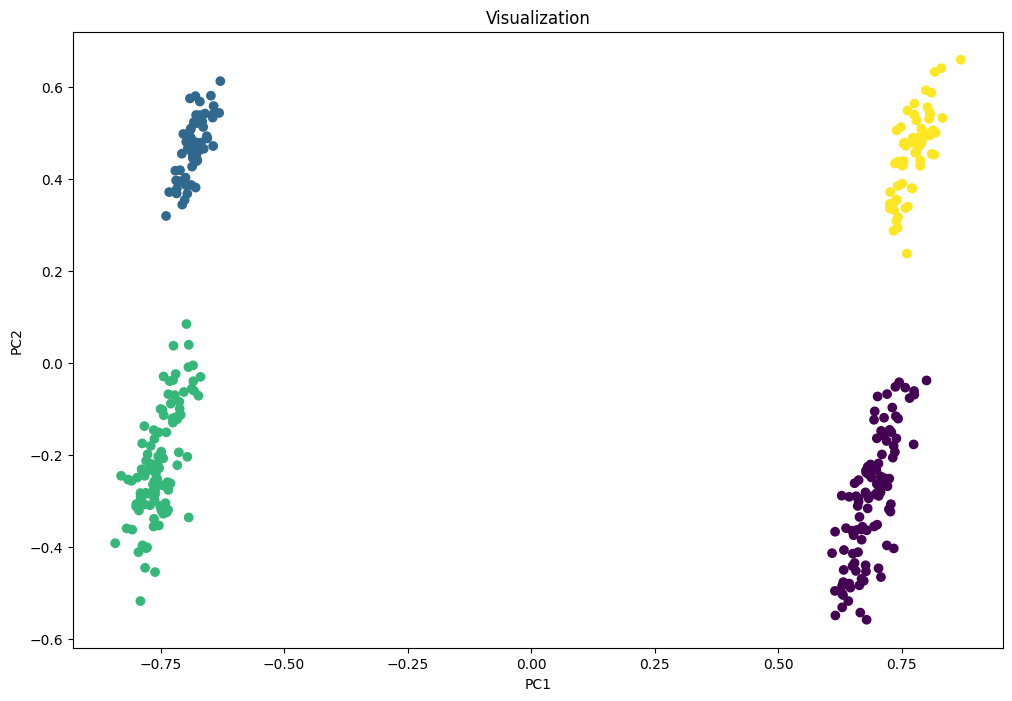

In [21]:
cls = KMeans(n_clusters=4, random_state=42)
cls.fit(df)
df['Cluster'] = cls.labels_

plt.figure(figsize=(12,8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Visualization")
plt.scatter(df['PC1'],df['PC2'],c=df['Cluster'])
plt.show()